# Introduction 

The school performance study of students is, due to its relevance and complexity, one of the issues of major controversy in the Educational research, and it has been given special attention over the time. This study shows a conceptual approach and one of the factors that influences the school performance of students . The data set conatains 8 rows and 1000 columns.
The aim of this data exploration is to get insights on the variables affecting students performances

# Preliminary wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the student performances data set
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


# checking the columns of the data

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.shape

(1000, 8)

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [13]:
df['race/ethnicity'].unique() 

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [14]:
df['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [15]:
df['reading score'].unique()

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40], dtype=int64)

In [16]:
df['writing score'].unique()

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23],
      dtype=int64)

In [46]:
df['parental level of education'].unique() 

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [48]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [49]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [52]:
student = df.drop(['race/ethnicity','parental level of education'], axis=1)

In [53]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74.0
1,female,standard,completed,69,90,88.0
2,female,standard,none,90,95,93.0
3,male,free/reduced,none,47,57,44.0
4,male,standard,none,76,78,75.0


In [17]:
#group by gender
df.groupby(['gender']).sum()

,math score,reading score,writing score
gender,,,
female,32962,37611,37538
male,33127,31558,30516


In [54]:
#showing the gender that has the highest score in math
dfcs = df.groupby("gender").sum()
dfcs.sort_values("math score", ascending=False , inplace=True)
dfcs.head(10)

,math score,reading score,writing score
gender,,,
male,33127,31566,30537.625
female,32962,37624,37556.750


In [25]:
#showing the gender that has the highest score in math
dfcs = df.groupby("lunch").sum()
dfcs.sort_values("reading score", ascending=False , inplace=True)
dfcs.head(10)

,math score,reading score,writing score
lunch,,,
standard,45172,46218,45684.875
free/reduced,20917,22972,22409.500


In [26]:
#showing the gender that has the highest score in math
dfcs = df.groupby("race/ethnicity").sum()
dfcs.sort_values("reading score", ascending=False , inplace=True)
dfcs.head(10) 

,math score,reading score,writing score
race/ethnicity,,,
group C,20564,22054,21652.875
group D,17649,18348,18378.000
group B,12056,12803,12477.750
group E,10335,10225,10000.875
group A,5485,5760,5584.875


In [28]:
#showing the gender that has the highest score in math
dfcs = df.groupby("test preparation course").sum()
dfcs.sort_values("reading score", ascending=False , inplace=True)
dfcs.head(5)

,math score,reading score,writing score
test preparation course,,,
none,41138,42736,41452.375
completed,24951,26454,26642.000


# showing the variables and the relationship in the data

In [55]:
corelation =student.corr()

<AxesSubplot:>

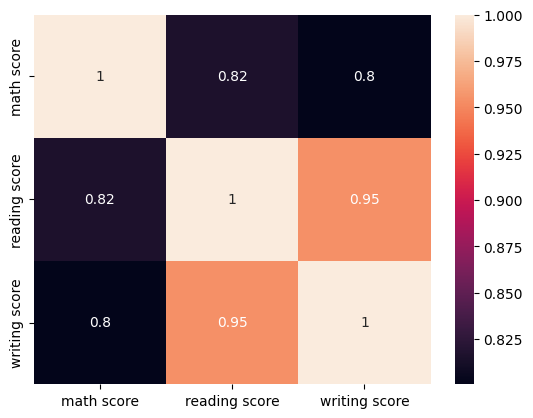

In [56]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns
            ,annot=True)

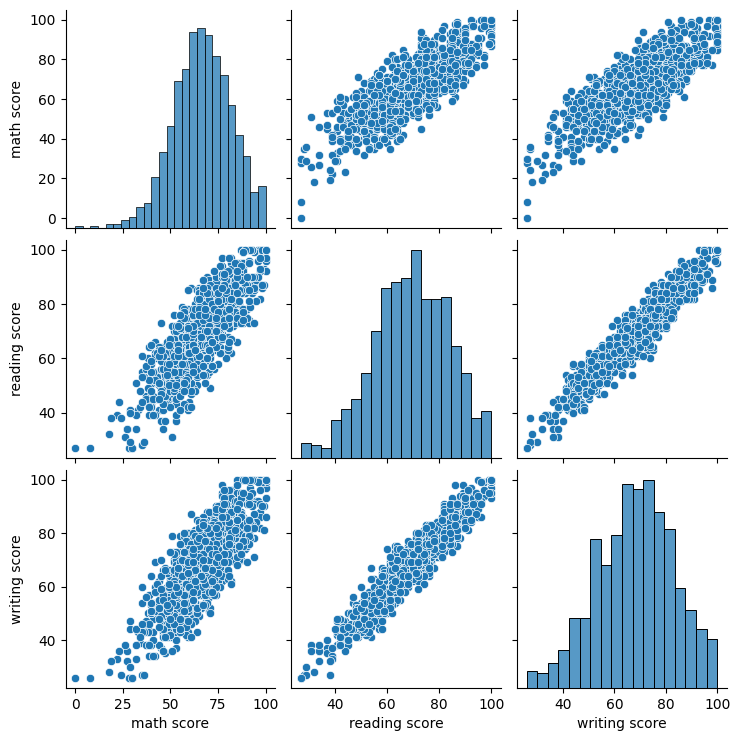

In [57]:
sns.pairplot(student)

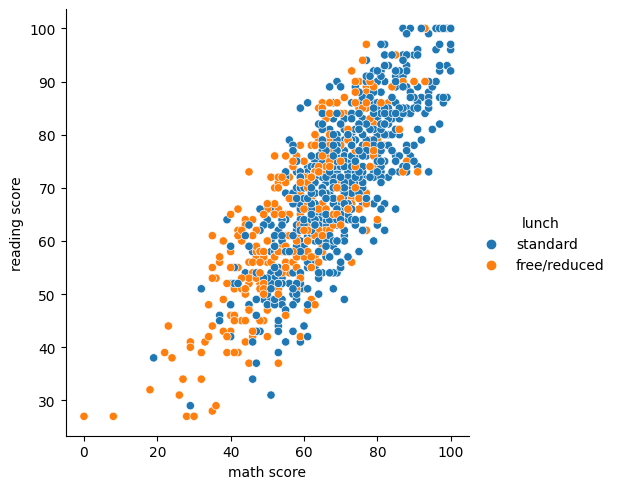

In [76]:
sns.relplot(x= 'math score', y='reading score', hue='lunch', data=student)

C:\Users\HP\AppData\Local\Temp\ipykernel_12968\2446884600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['writing score'], bins=5)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

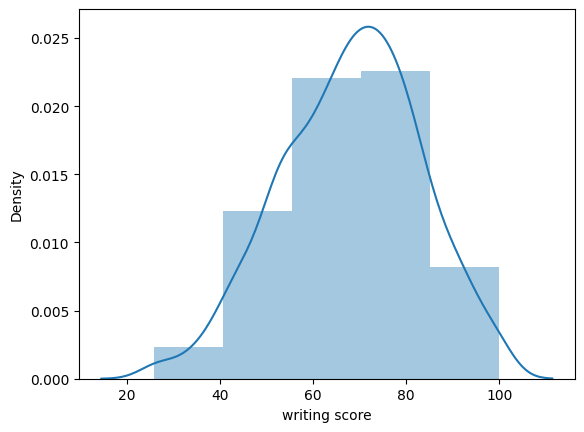

In [66]:
sns.distplot(student['writing score'], bins=5)

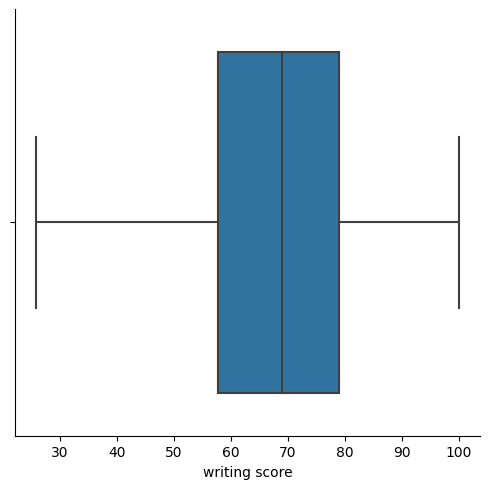

In [69]:
sns.catplot(x='writing score', kind='box',data=student)

<AxesSubplot:title={'center':'maths score for test prep'}, xlabel='test preparation course'>

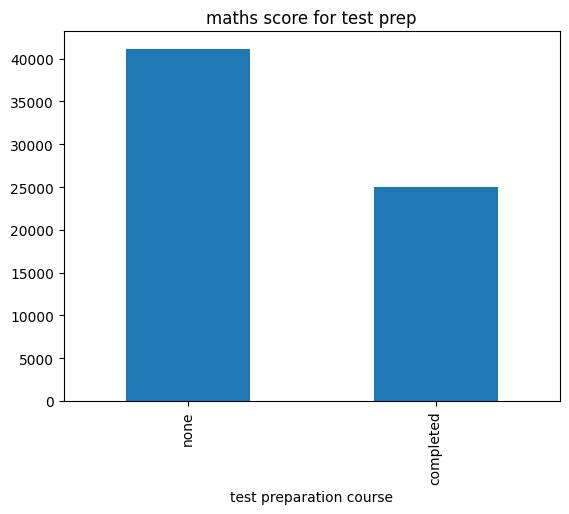

In [31]:
dfcs['math score'].head(10).plot.bar(title="maths score for test prep")

# visualizing the strength of correlation among the variables

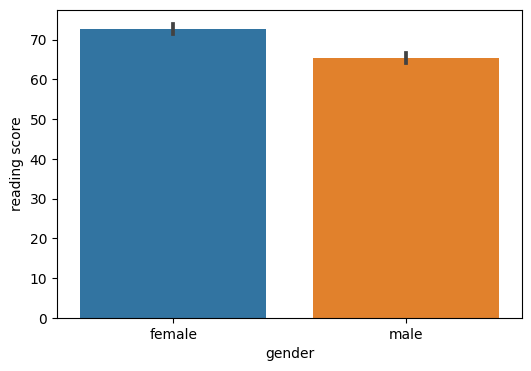

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(x = df["gender"], y =df["reading score"])
plt.xlabel = ("gender")
plt.ylabel = ("gender, reading score")

In [33]:
g = df.groupby("gender")
print(g)

In [34]:
x = df.groupby('lunch') ['gender'].count()

In [35]:
print(x)

lunch
free/reduced    355
standard        645
Name: gender, dtype: int64


In [36]:
#grouping the gender according to their parental level of education
G_PLOE = df.groupby(['gender', 'parental level of education'], as_index=False).gender.mean(5)
print(G_PLOE)

    gender parental level of education
0   female          associate's degree
1   female           bachelor's degree
2   female                 high school
3   female             master's degree
4   female                some college
5   female            some high school
6     male          associate's degree
7     male           bachelor's degree
8     male                 high school
9     male             master's degree
10    male                some college
11    male            some high school


In [37]:
vf= df.rename(columns = {'test preparation course':'test_preparation_course','parental level of education':'parental_level_of_education', 'math score':'math_score','reading score':'reading_score','writing score':'writing_score','race/ethnicity':'race_ethnicity' })
vf.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74.0
1,female,group C,some college,standard,completed,69,90,88.0
2,female,group B,master's degree,standard,none,90,95,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44.0
4,male,group C,some college,standard,none,76,78,75.0


In [38]:
#grouping the gender according to their parental level of education
GPLOA = vf.groupby(['gender', 'math_score'], as_index=False).test_preparation_course.mean(100)
print(GPLOA)

     gender  math_score
0    female           0
1    female           8
2    female          18
3    female          19
4    female          22
..      ...         ...
142    male          96
143    male          97
144    male          98
145    male          99
146    male         100

[147 rows x 2 columns]


In [39]:
#grouping the gender according to their parental level of education
GPLOA = vf.groupby(['gender', 'writing_score'], as_index=False).test_preparation_course.mean(147)
print(GPLOA)

     gender  writing_score
0    female         25.875
1    female         27.000
2    female         28.000
3    female         30.000
4    female         32.000
..      ...            ...
128    male         92.000
129    male         93.000
130    male         95.000
131    male         99.000
132    male        100.000

[133 rows x 2 columns]


In [40]:
#grouping the gender according to their 
GPLOA = vf.groupby(['gender', 'reading_score'], as_index=False).test_preparation_course.mean(147)
print(GPLOA)

     gender  reading_score
0    female             27
1    female             29
2    female             31
3    female             32
4    female             34
..      ...            ...
124    male             92
125    male             93
126    male             96
127    male             97
128    male            100

[129 rows x 2 columns]


# plot showing the relationship of scores(math, reading, and writing)

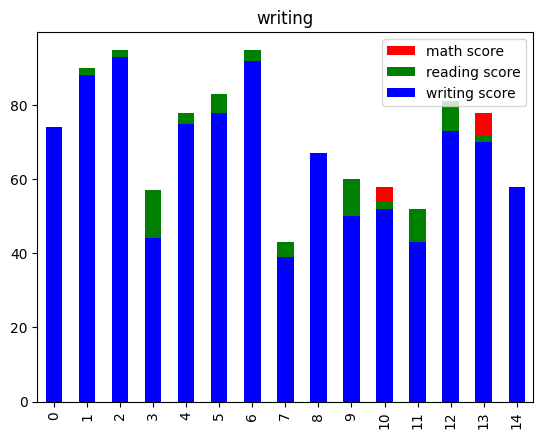

In [41]:
df['math score'].head(15).plot.bar(color = 'red', title= "math")
df['reading score'].head(15).plot.bar(color = 'green', title= "reading")
df['writing score'].head(15).plot.bar(color= 'blue', title= "writing")
plt.legend()

# conclusion about the student's performance

from the data analyzed above, it can be deduced that;

 1. There were no empty or null value present in the data set
 2. The parental level of education and race/ethnicity was dropped out 
 3. Comparing the scores of the students in maths, reading and writing; for maths, males had the highest while females had the least, for reading, female had the highest while males had the least, for writing, females had the highest while males had the least. it can also be deduced that the distance between writing scores of the males and females has a distance of 7022 which really shows that the female students really worked/prepared hard in writing than the male students.
 4. The scatter plot shows the relationship in the lunch

 in terms of parental level of eduaction, it can be seen that the associate's degree and some college had the best results compared to other parental level of education while those of bachelor's degree and master's degreee had the least

Also comparing the test score for maths in terms of how they completed and how many didn't, it can be deduced too that the rate of people who completed was definitely low comapred to those that didn't.